In [1]:
from smach_utils2 import *
import matplotlib.pyplot as plt

%matplotlib inline

import cv2
import numpy as np

%matplotlib inline


[ WARN] [1703428577.579067110]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2392.557000 according to authority /pose_integrator
[ WARN] [1703428577.579122284]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2392.557000 according to authority /pose_integrator
[ WARN] [1703428577.579160583]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2392.557000 according to authority /pose_integrator
[ WARN] [1703428577.579195181]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2392.557000 according to authority /pose_integrator
[ WARN] [1703428577.579227575]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2392.557000 according to authority /pose_integrator
[ WARN] [1703428577.579259569]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 2392.557000 according to authority /pose_integrator


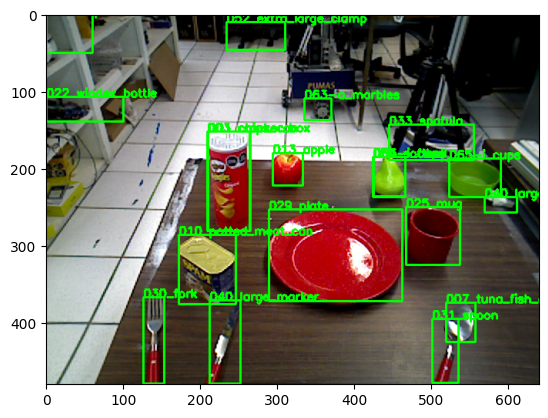

In [2]:
debug_image=np.load('debug.npy')
plt.imshow(debug_image)

In [ ]:
test_img=rgbd.get_image()
test_img= cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)## CONVERT TO CV U MAT
test_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [ ]:
plt.imshow(test_img)

In [ ]:
#model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

In [ ]:

img_with_boxes=np.load('img.npy')


In [ ]:
plt.imshow(img_with_boxes)

In [ ]:
test_img= cv2.cvtColor(img_with_boxes, cv2.COLOR_RGB2BGR)
plt.imshow(test_img)

In [ ]:
test_img=img

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

import torch
import torch.backends.cudnn as cudnn

from yolov5.models.experimental import attempt_load
#from yolov5.utils.dataloaders import LoadStreams, LoadImages
from yolov5.utils.general import *
#from yolov5.utils.general import check_img_size, check_requirements, check_imshow, colorstr, non_max_suppression, \
    #apply_classifier, scale_boxes, scale_segments, xyxy2xywh, strip_optimizer, set_logging, increment_path#, save_one_box
from yolov5.utils.torch_utils import select_device #select_device, load_classifier, time_sync


In [ ]:
device = select_device('')
model=attempt_load('/home/roboworks/catkin_extras/src/yolov5_ros/scripts/yolov5/ycb.pt',device)

In [ ]:
#img_with_boxes=np.load('img.npy')  # FROM TAKESHI RGBD GET IMAGE BGR
#test_img= cv2.cvtColor(img_with_boxes, cv2.COLOR_RGB2BGR)  ##RGB


img = torch.from_numpy(test_img).to(device) # RGB IMAGE TENSOR (TORCH)
img = img / 255.0                              #NORMALIZE
img=img.unsqueeze(0)                        # ADD DIMENSION FOR TENSOR ( BATCH)
img=torch.moveaxis(img,3,1)                  #Channel order for YOLO

In [ ]:
img.shape


In [ ]:
pred = model(img, augment=False)[0]
pred = non_max_suppression(pred)  # IOU 
debug_img=np.copy(test_img)

for i, det in enumerate(pred):
    
    print ('######################',i)
    for *xyxy, conf, cls in (det):# Model Result is bounding box  confidence  and class
        if conf.cpu().tolist() > 0.5:
            pt_min=[int(xyxy[0].cpu().tolist()),int(xyxy[1].cpu().tolist())]
            pt_max=[int(xyxy[2].cpu().tolist()),int(xyxy[3].cpu().tolist())]
            debug_img=cv2.rectangle(debug_img ,pt_min,pt_max,  (0, 255, 0), 2
            )
            debug_img= cv2.putText(debug_img ,model.names[int(cls.cpu().tolist())]
                                   , pt_min,
                       cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2)
            print (pt_min, pt_max,conf.cpu().tolist(),model.names[int(cls.cpu().tolist())])
np.save('debug.npy',debug_img)  # IMAGE WITH BOUNDING BOX

In [ ]:
plt.imshow(debug_img)

In [ ]:
import torch
import torch.backends.cudnn as cudnn
from yolov5.models.experimental import attempt_load
from yolov5.utils.dataloaders import LoadStreams, LoadImages
from yolov5.utils.general import *



In [ ]:

from yolov5.models.experimental import attempt_load
from yolov5.utils.dataloaders import LoadStreams, LoadImages
from yolov5.utils.general import *

In [ ]:
from yolov5.utils.augmentations import letterbox
from yolov5.utils.plots import colors, Annotator
from yolov5.utils.torch_utils import * #select_device, load_c

In [ ]:
device = select_device('')
model=attempt_load('/home/roboworks/catkin_extras/src/yolov5_ros/scripts/yolov5/ycb.pt',device)

In [ ]:
model.names

In [ ]:
img = torch.from_numpy(img).to(device)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
# Load model and weights to GPU via cuda if available
model=attempt_load('/home/roboworks/catkin_extras/src/yolov5_ros/scripts/yolov5/ycb.pt',device)

In [ ]:
model.info()

In [ ]:
#img = torch.from_numpy(rgbd.get_image()).to(device)
img=np.copy (img_with_boxes)
img = torch.from_numpy(img).to(device)


img = img / 255.0

In [ ]:
img.shape

In [ ]:
img = img / 255.0
iimmgg=img.unsqueeze(0)
iimmgg.shape


In [ ]:
im=torch.moveaxis(iimmgg,3,1)

In [ ]:
im.shape

In [ ]:
res= model(im)
pred = res[0]
boxes = pred[:, :4].cpu().numpy()
scores = pred[:, 4].cpu().numpy()
labels = pred[:, 5].cpu().numpy()
# Draw bounding boxes on the image
img_with_boxes = im[0].permute(1, 2, 0).cpu().numpy()
img_with_boxes = (img_with_boxes * 255).astype('uint8')
# Reshape boxes to (num_boxes, 4)
boxes = np.squeeze(boxes, axis=0)  # Remove the singleton dimension
boxes = np.transpose(boxes, (1, 0))  # Transpose to get (num_boxes, 4)

# Convert the image to BGR (OpenCV uses BGR order)
img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_RGB2BGR)
for box, score, label in zip(boxes, scores, labels):
    if np.any(score > 0.15):  # Check if any score is greater than 0.5
        print('here')
        box = box.astype(int)  # Convert box coordinates to integers
        pt1 = (box[0], box[1])
        pt2 = (box[2], box[3])

        img_with_boxes = cv2.rectangle(
            img_with_boxes, pt1, pt2, (0, 255, 0), 2
        )
np.save('img.npy', img_with_boxes)     

In [ ]:
plt.imshow(img_with_boxes)


In [ ]:
# Convert the image to BGR (OpenCV uses BGR order)
img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_RGB2BGR)

for box, score, label in zip(boxes, scores, labels):
    if np.any(score > 0.5):  # Check if any score is greater than 0.5
        box = box.astype(int)  # Convert box coordinates to integers
        #print (box)
        pt1 = (box[0], box[1])
        pt2 = (box[2], box[3])
        print(pt1,pt2,'pts')
        img_with_boxes = cv2.rectangle(
            img_with_boxes, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2
        )
        img_with_boxes = cv2.putText(
            img_with_boxes,
            f"{model.names[int(label)]}: {score:.2f}",
            (box[0], box[1] - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2,
        )

In [ ]:
boxes.shape

In [ ]:
plt.imshow(img_with_boxes)

In [ ]:
img_with_boxes.shape

In [ ]:
plt.imshow(rgbd.get_image())

In [ ]:
res[0].shape

In [ ]:
augment= False
pred = model(im, augment=augment, visualize=False)[0]
conf_thres=0.5  # confidence threshold
iou_thres=0.45  # NMS IOU threshold
max_det=1000
classes=0
agnostic_nms=False
D = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms,max_det)

In [ ]:
D

In [ ]:
len(det)

In [ ]:
modelc = load_classifier(name='resnet101', n=2) 

In [ ]:
import yolov5

In [ ]:
yolov5.utils.

In [ ]:
read_yaml('/known_locations.yaml')
#read_yaml('/known_locations_sim.yaml')

In [ ]:
df=yaml_to_df('/known_locations.yaml')
#df=yaml_to_df('/known_locations_sim.yaml')

In [ ]:
xys=[]
xys.append(df[df['child_id_frame']=='bedroom'][['x','y']].values.ravel())
xys.append(df[df['child_id_frame']=='living_room'][['x','y']].values.ravel())
xys.append(df[df['child_id_frame']=='dining_room'][['x','y']].values.ravel())
xys.append(df[df['child_id_frame']=='kitchen'][['x','y']].values.ravel())
room_names=['bedroom','living_room','dining_room','kitchen']
xys, room_names

In [ ]:
humanpose=detect_human_to_tf()  #make sure service is running
humanpose

In [ ]:
tf_man.getTF('human')

In [ ]:
import matplotlib.pyplot as plt

map_msg= rospy.wait_for_message('/prohibition_layer_map', OccupancyGrid)
#map_msg= rospy.wait_for_message('/augmented_map', OccupancyGrid)
inflated_map= np.asarray(map_msg.data)
#cv2.imwrite('/home/roboworks/Pictures/inflatedmap.png',inflated_map)

In [ ]:

img_map=inflated_map.reshape((map_msg.info.width,map_msg.info.height))


plt.imshow(img_map)

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

In [ ]:
res=segmentation_server.call()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

if len(res.poses.data)==0: print( 'failed')
else:
    print('object found')
    
    poses=np.asarray(res.poses.data)
    poses=poses.reshape((int(len(poses)/3) ,3     )      )  
    num_objs=len(poses)
    print (num_objs)
    for i,pose in enumerate(poses):
        #print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        point_name=f'object_{i}'
        tf_man.pub_static_tf(pos=pose, point_name=point_name, ref='head_rgbd_sensor_rgb_frame')## which object to choose   #TODO
        rospy.sleep(0.3)
        tf_man.change_ref_frame_tf(point_name=point_name, new_frame='map')
        rospy.sleep(0.3)
        pose,_= tf_man.getTF(point_name)
        print (f'Occupancy map at point object {i}-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])
        if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of arena, occupied inflated map')
            tf_man.pub_static_tf(pos=[0,0,0], point_name=point_name, ref='head_rgbd_sensor_rgb_frame')
            num_objs-=1
        print (f"object found at robot coords.{pose} ")

print(num_objs)

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
humanpose=detect_human_to_tf()  #make sure service is running

In [ ]:
if humanpose== False:
    
    print ('no human ')
    
else : 
    human_pose,_=tf_man.getTF('human')

    pose=human_pose[:2]
    
    if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of the audience, outside of the arena map')
            
    dists=(pose-np.asarray(xys))
    human_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'human in {human_room}')
    
    robot_pose=get_robot_px()
    dists=(robot_pose-np.asarray(xys))
    robot_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'Robot  in {robot_room}')
    
    if robot_room != human_room: print('maybe false positive... ignoring... ')
    

In [ ]:
def draw_at (px,py, contoured):
    contoured[px-5:px+5,py-5:py+5]=200
    return contoured
    

In [ ]:
iimg=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) , img_map )
#iimg=draw_at(origin_map_img[1], origin_map_img[0] , img_map )

In [ ]:
plt.imshow(iimg)

In [ ]:
pose=human_pose
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

print ('Occupancy map at point human-> pixels ',origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)])




In [ ]:
xys

In [ ]:
human_pose,_=tf_man.getTF('human')
human_pos=human_pose[:2]

In [ ]:
human_pos=human_pose[:2]

In [ ]:
#human_pos=np.asarray([10.6,-2.33])

In [ ]:
dists=(human_pos-np.asarray(xys))
room_names[np.linalg.norm(dists, axis=1).argmin()]

In [ ]:

xys.append(df[df['child_id_frame']=='bedroom'][['x','y']].values)

In [ ]:

x=df[df['child_id_frame']=='bedroom'][['x','y']].values

In [ ]:
x.ravel().shape

In [ ]:
img_map[300,285:315]

In [ ]:
import cv2
cv2.imwrite('/home/roboworks/Pictures/imgmap.png', img_map)
img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap.png')

In [ ]:
import cv2
img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap_rooms.png')

In [ ]:
plt.imshow(img_map_rooms)

In [ ]:

iimg=draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m) , img_map_rooms )

In [ ]:
plt.imshow(iimg)

In [ ]:
img_map_rooms=cv2.imread('/home/roboworks/catkin_extras/src/tmc_wrs_gazebo_world/maps/rc2023/map.pgm')

img_map_rooms[origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m)]

In [ ]:
#living_room

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
humanpose=detect_human_to_tf()  #make sure service is running
if humanpose== False:
    
    print ('no human ')
    
else : 
    human_pose,_=tf_man.getTF('human')

    pose=human_pose[:2]
    
    if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of the audience, outside of the arena map')
            
    dists=(pose-np.asarray(xys))
    human_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'human in {human_room}')
    
    robot_pose=get_robot_px()
    dists=(robot_pose-np.asarray(xys))
    robot_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'Robot  in {robot_room}')
    
    if robot_room != human_room: print('maybe false positive... ignoring... ')
    

In [ ]:
img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap_rooms.png')
img_map_rooms[origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m)]

In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
humanpose=detect_human_to_tf()  #make sure service is running
if humanpose== False:
    
    print ('no human ')
    
else : 
    human_pose,_=tf_man.getTF('human')

    pose=human_pose[:2]
    
    if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of the audience, outside of the arena map')
            
    dists=(pose-np.asarray(xys))
    human_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'human in {human_room}')
    
    robot_pose=get_robot_px()
    dists=(robot_pose-np.asarray(xys))
    robot_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'Robot  in {robot_room}')
    
    if robot_room != human_room: print('maybe false positive... ignoring... ')
    

In [ ]:
img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap.png')
img_map_rooms[origin_map_img[1]+ round(pose[1]/pix_per_m), origin_map_img[0]+ round(pose[0]/pix_per_m)]

In [ ]:
import cv2
import matplotlib.pyplot as plt

import numpy as np
#cv2.imwrite('/home/roboworks/Pictures/imgmap.png', img_map)
#img_map_rooms=cv2.imread('/home/roboworks/Pictures/imgmap.png')

cropping = False

x_start, y_start, x_end, y_end = 0, 0, 0, 0

image = img_map_rooms
oriImage = image.copy()
ii = image.copy()
room_no=0
regions=[]
global room_no , regions
def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
    global x_start, y_start, x_end, y_end, cropping,room_no
    
    # if the left mouse button was DOWN, start RECORDING
    # (x, y) coordinates and indicate that cropping is being
    if event == cv2.EVENT_LBUTTONDOWN:
        

        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True
        

    # Mouse is Moving
    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping :
            x_end, y_end = x, y

    # if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates
        x_end, y_end = x, y
        cropping = False # cropping is finished

        refPoint = [(x_start, y_start), (x_end, y_end)]

        if len(refPoint) == 2: #when two points were found
            room_no+=1
            print (room_no)
            cv2.rectangle(ii, (x_start, y_start), (x_end, y_end), (255*np.random.rand(),255*np.random.rand(),255*np.random.rand()), -1)
            regions.append(((x_start, y_start), (x_end, y_end)))
            print (regions)
            cv2.putText(ii, f'room{room_no}', (x_end,y_end),cv2.FONT_HERSHEY_SIMPLEX, 1 , (255, 0, 0),cv2.LINE_4)
            cv2.imshow("rooms", ii)

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_crop)

while True:

    i = image.copy()

    if not cropping:
        cv2.imshow("image", image)

    elif cropping:
        cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 255,255), 6)
        cv2.imshow("image", i)
    
    
    
    keystroke = cv2.waitKey(0)
    if 32 <= keystroke and keystroke < 128:
        key = chr(keystroke).lower()
        print (key)
        if key=='q':
            cv2.destroyAllWindows()
            
            break


living_room_px_region=np.asarray(regions[0])
kitchen_px_region=np.asarray(regions[1])
bedroom_px_region=np.asarray(regions[2])
dining_room_px_region=np.asarray(regions[3])
    
# close all open windows


In [ ]:
living_room_px_region


In [ ]:
l=np.asarray(regions[0])
living_room_px_region=np.asarray([(241, 222), (322, 328)])
print(l , living_room_px_region)

In [ ]:
iimg=draw_at(px_pose[1],px_pose[0],img_map)
plt.imshow (iimg)

In [ ]:
np.asarray((origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)))

In [ ]:
pose=get_robot_px()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

px_pose=np.asarray((origin_map_img[0]+pose[0],origin_map_img[1]+pose[1]))
px_pose

In [ ]:
humanpose=detect_human_to_tf()  #make sure service is running


In [ ]:
##REAL LAB
#living_room_px_region=np.asarray([(422, 190), (494, 254)])
#dining_room_px_region=np.asarray([(419, 144), (497, 196)])
#kitchen_px_region=np.asarray([(385, 185), (425, 243)])
#bedroom_px_region=np.asarray([(320, 173), (372, 238)])


##RC SIM
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

living_room_px_region=np.asarray([(241, 222), (322, 328)])
kitchen_px_region=np.asarray([(331, 220), (414, 328)])

bedroom_px_region=np.asarray([(331, 164), (412, 208)])
dining_room_px_region=np.asarray([(239, 163), (320, 214)])


def check_room_px(px_pose):
    
    for i in range(4):
        if i==0:
            px_region=living_room_px_region
            region='living_room'
        if i==1:
            px_region=kitchen_px_region
            region='kitchen'
        if i==2:
            px_region=bedroom_px_region
            region='bedroom'
        if i==3:
            px_region=dining_room_px_region
            region='dining_room'
        #print (region,px_region,px_pose)
        if (px_pose[1]< px_region[1,1]) and (px_pose[1]> px_region[0,1]) and (px_pose[0]> px_region[0,0]) and (px_pose[0]< px_region[1,0]) : 
            print (f'in  {region}')
            return region

In [ ]:
humanpose=detect_human_to_tf()  #make sure service is running

if humanpose== False:
    
    print ('no human ')
    
else : 
    human_pose,_=tf_man.getTF('human')

    pose=human_pose[:2]
    px_pose_human=np.asarray(([origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]))
    if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of the audience, outside of the arena map')
    
    pose=get_robot_px()
    px_pose_robot=np.asarray((origin_map_img[0]+pose[0],origin_map_img[1]+pose[1]))
    origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
    room_robot,room_human=check_room_px(px_pose_robot),check_room_px(np.flip(px_pose_human))

    print ('px robot',px_pose_robot,px_pose_human)
    print('room_robot,room_human',room_robot,room_human)

In [ ]:
##REAL LAB
living_room_px_region=np.asarray([(422, 190), (494, 254)])
dining_room_px_region=np.asarray([(419, 144), (497, 196)])
kitchen_px_region=np.asarray([(385, 185), (425, 243)])
bedroom_px_region=np.asarray([(320, 173), (372, 238)])


##RC SIM
living_room_px_region=np.asarray([(241, 222), (322, 328)])
kitchen_px_region=np.asarray([(331, 220), (414, 328)])

bedroom_px_region=np.asarray([(331, 164), (412, 208)])
dining_room_px_region=np.asarray([(239, 163), (320, 214)])



In [ ]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]
humanpose=detect_human_to_tf()  #make sure service is running
humanpose

In [ ]:
human_pose,_=tf_man.getTF('human')

pose=human_pose[:2]
if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
        print ('reject point, most likely part of the audience, outside of the arena map')

In [ ]:

if humanpose== False:
    
    print ('no human ')
    
else : 
    human_pose,_=tf_man.getTF('human')

    pose=human_pose[:2]
    
    if img_map[origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m)]!=0:#### Yes axes seem to be "flipped" !=0:
            print ('reject point, most likely part of the audience, outside of the arena map')
            
    dists=(pose-np.asarray(xys))
    human_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'human in {human_room}')
    
    robot_pose=get_robot_px()
    dists=(robot_pose-np.asarray(xys))
    robot_room=room_names[np.linalg.norm(dists, axis=1).argmin()]
    print(f'Robot  in {robot_room}')
    
    if robot_room != human_room: print('maybe false positive... ignoring... ')
    

In [ ]:
robot_pose=get_robot_px()
robot_pose_px=[origin_map_img[1]+ round(robot_pose[1]/pix_per_m),origin_map_img[0]+ round(robot_pose[0]/pix_per_m)]

In [ ]:
pose=get_robot_px()
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]

In [ ]:
origin_map_img

In [ ]:
get_robot_px()

In [ ]:
px_pose

In [ ]:
origin_map

In [ ]:
iimg=draw_at(px_pose_robot[0] ,px_pose_robot[1], img_map )
#iimg= draw_at(origin_map_img[1]+ round(pose[1]/pix_per_m),origin_map_img[0]+ round(pose[0]/pix_per_m), img_map)


In [ ]:
plt.imshow(iimg)

In [ ]:
px_pose_human

In [ ]:
next_room= 'living_room'
kl_pose_bedroom=(df[df['child_id_frame']=='bedroom'][['x','y','th']].values.ravel())
kl_room=(df[df['child_id_frame']==next_room][['x','y','th']].values.ravel())
kl_room

In [ ]:
kl_room=(df[df['child_id_frame']==next_room][['x','y','th']].values.ravel())
omni_base.move_base(goal_x=kl_room[0],goal_y=kl_room[1],goal_theta=kl_room[2] )

In [ ]:
trans, _=tf_man.getTF('base_link')
robot_pose=np.asarray(trans[:2])
    
robot_pose

In [ ]:

xys, room_names

In [ ]:
dists=(robot_pose-np.asarray(xys))
robot_room=room_names[np.linalg.norm(dists, axis=0).argmin()]

In [ ]:
robot_room

In [ ]:
xys

In [ ]:
import cv2
import numpy as np
drawing = False
ix,iy = -1,-1

# define mouse callback function to draw circle
def draw_rectangle(event, x, y, flags, param):
   global ix, iy, drawing, img
   if event == cv2.EVENT_LBUTTONDOWN:
      drawing = True
      ix = x
      iy = y
   elif event == cv2.EVENT_LBUTTONUP:
      drawing = False
      cv2.rectangle(img, (ix, iy),(x, y),(0, 255, 255),-1)

# Create a black image
img = np.zeros((512,700,3), np.uint8)

# Create a window and bind the function to window
cv2.namedWindow("Rectangle Window")

# Connect the mouse button to our callback function
cv2.setMouseCallback("Rectangle Window", draw_rectangle)


In [ ]:
# define mouse callback function to draw circle
def draw_rectangle(event, x, y, flags, param):
   global ix, iy, drawing, img
   if event == cv2.EVENT_LBUTTONDOWN:
      drawing = True
      ix = x
      iy = y
   elif event == cv2.EVENT_LBUTTONUP:
      drawing = False
      cv2.rectangle(img, (ix, iy),(x, y),(0, 255, 255),-1)

# Create a black image
img = np.zeros((512,700,3), np.uint8)

# Create a window and bind the function to window
cv2.namedWindow("Rectangle Window")

# Connect the mouse button to our callback function
cv2.setMouseCallback("Rectangle Window", draw_rectangle)

# display the window
while True:
   cv2.imshow("Rectangle Window", img)
   if cv2.waitKey(10) == 27:
        break
      

In [ ]:
import numpy as np
import cv2

In [ ]:
from interactive_markers.interactive_marker_server import *
from visualization_msgs.msg import *

In [ ]:
int_marker = InteractiveMarker()

In [ ]:
InteractiveMarkerControl

In [ ]:
control = InteractiveMarkerControl()

In [ ]:
control

In [ ]:

import tf


In [ ]:
import torch
import utils
display = utils.notebook_init()  # checks
     


In [ ]:
import torch

# Model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom

# Images
img = "https://ultralytics.com/images/zidane.jpg"  # or file, Path, PIL, OpenCV, numpy, list

# Inference
results = model(img)

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
results

In [ ]:
results = model(img_with_boxes)
results.pandas().xyxy[0]

In [ ]:
results.pandas().xyxy[0]

In [ ]:
plt.imshow(img_with_boxes)

In [ ]:
import cv2

In [ ]:
debug_img = cv2.cvtColor(img_with_boxes, cv2.COLOR_RGB2BGR)

In [ ]:
plt.imshow(debug_img)

In [ ]:
results.pandas().xyxy[0]

In [ ]:
pt_min=np.asarray(results.pandas().xyxy[0][['xmin','ymin']].astype('int')[:].values)
pt_max=np.asarray(results.pandas().xyxy[0][['xmax','ymax']].astype('int')[:].values)
names=np.asarray(results.pandas().xyxy[0]['name'][:].values)
pt_min,pt_max,names

In [ ]:
for i in range(len(results.pandas().xyxy[0])):
    debug_img=cv2.rectangle(debug_img ,pt_min[i],pt_max[i] ,  (0, 255, 0), 2
        )
    debug_img= cv2.putText(debug_img , names[i], pt_min[i],
                       cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2)

In [ ]:
plt.imshow(debug_img)

In [ ]:
res= model(im)

In [ ]:
pred = model(im, augment=False, visualize=False)[0]
pred = non_max_suppression(pred)
debug_img=np.copy(img_with_boxes)
for i, det in enumerate(pred):
    
    print ('######################',i)
    for *xyxy, conf, cls in reversed(det):
        if conf.cpu().tolist() > 0.5:
            pt_min=[int(xyxy[0].cpu().tolist()),int(xyxy[1].cpu().tolist())]
            pt_max=[int(xyxy[2].cpu().tolist()),int(xyxy[3].cpu().tolist())]
            debug_img=cv2.rectangle(debug_img ,pt_min,pt_max,  (0, 255, 0), 2
            )
            debug_img= cv2.putText(debug_img ,model.names[int(cls.cpu().tolist())]
                                   , pt_min,
                       cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            2)
            print (ptmin, ptmax,conf.cpu().tolist(),model.names[int(cls.cpu().tolist())])

In [ ]:
np.save('debug.npy',debug_img)

In [ ]:
plt.imshow(img_with_boxes)

In [ ]:
gn = torch.tensor(im.shape)[[1, 0, 1, 0]]  # normalization gain whwh

In [ ]:
for i, det in enumerate(pred):
    print( f'i{i},det{det}')


In [ ]:

annotator = Annotator(im, example=str(model.names))

In [ ]:
det[:, :4] = scale_boxes(

In [ ]:
for *xyxy, conf, cls in reversed(det):
    xmin ,ymin=int(xyxy[0].cpu().tolist()),int(xyxy[1].cpu().tolist())
    xmax,ymax=int(xyxy[2].cpu().tolist()),int(xyxy[3].cpu().tolist())
    
    print (xmin ,ymin , xmax,ymax,conf.cpu().tolist(),model.names[int(cls.cpu().tolist())])

In [ ]:
xmin ,ymin=int(xyxy[0].cpu().tolist()),int(xyxy[1].cpu().tolist())
xmax,ymax=int(xyxy[2].cpu().tolist()),int(xyxy[3].cpu().tolist())
xmin ,ymin , xmax,ymax

In [ ]:
model.names

In [ ]:
for i, det in enumerate(pred):
    print( f'i{i},det{det}')


In [ ]:
boxes.shape

In [ ]:
results = model_ycb(img_with_boxes)
results.pandas().xyxy[0]

In [ ]:
results = model(img_with_boxes)
results.pandas().xyxy[0]

In [ ]:
model

In [ ]:
img = letterbox(img_with_boxes, (640,480))

In [ ]:
type(img)

In [ ]:
img = img.transpose((2, 0, 1))[::-1]